In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
# importing models
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
# importing metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings('ignore')

In [2]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(xtrain,ytrain)
    print("Training score: {}".format(model.score(xtrain,ytrain)))
    predictions = model.predict(xtest)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(ytest,predictions) 
    print("r2 score is: {}".format(r2score))  
    print('MSE:{}'.format(mean_squared_error(ytest,predictions)))     
#     sns.distplot(ytest-predictions)
    return model

In [3]:
#importing data
df=pd.read_csv('final_data.csv')

In [4]:
print(df.shape)
df.head()

(69953, 21)


,airline,documentNumber,date_of_Issue,place_of_Issue,Coupon Number,Sector Number,departure_date,Journey Sectors,online_Origin,online_Destination,...,true_Origin,true_Destination,true_POT,from_City,to_City,number_of_stops,ticket_type,price,class_code,class
0,United Airlines,2444397226,31/10/2022,MIL,2,2,01/11/2022,SFO\LHR\KGL,LHR,KGL,...,SFO,KGL,KGL,LHR,KGL,1,One-way,570.69,L,Economy Discounted
1,United Airlines,2445791259,07/11/2022,EWR,1,1,08/11/2022,KGL\LHR\EWR,KGL,LHR,...,KGL,EWR,EWR,KGL,LHR,1,One-way,953.41,Q,Economy Discounted
2,United Airlines,2445791966,07/11/2022,KGL,1,1,08/11/2022,KGL\LHR\EWR,KGL,LHR,...,KGL,EWR,EWR,KGL,LHR,1,One-way,437.31,Q,Economy Discounted
3,United Airlines,2445792553,07/11/2022,EWR,1,1,08/11/2022,KGL\LHR\EWR,KGL,LHR,...,KGL,EWR,EWR,KGL,LHR,1,One-way,754.54,Q,Economy Discounted
4,United Airlines,2449374770,28/11/2022,SFO,3,3,29/11/2022,GRR\ORD\BRU\KGL,BRU,KGL,...,GRR,KGL,KGL,BRU,KGL,2,One-way,472.42,Y,Economy


<function matplotlib.pyplot.show(close=None, block=None)>

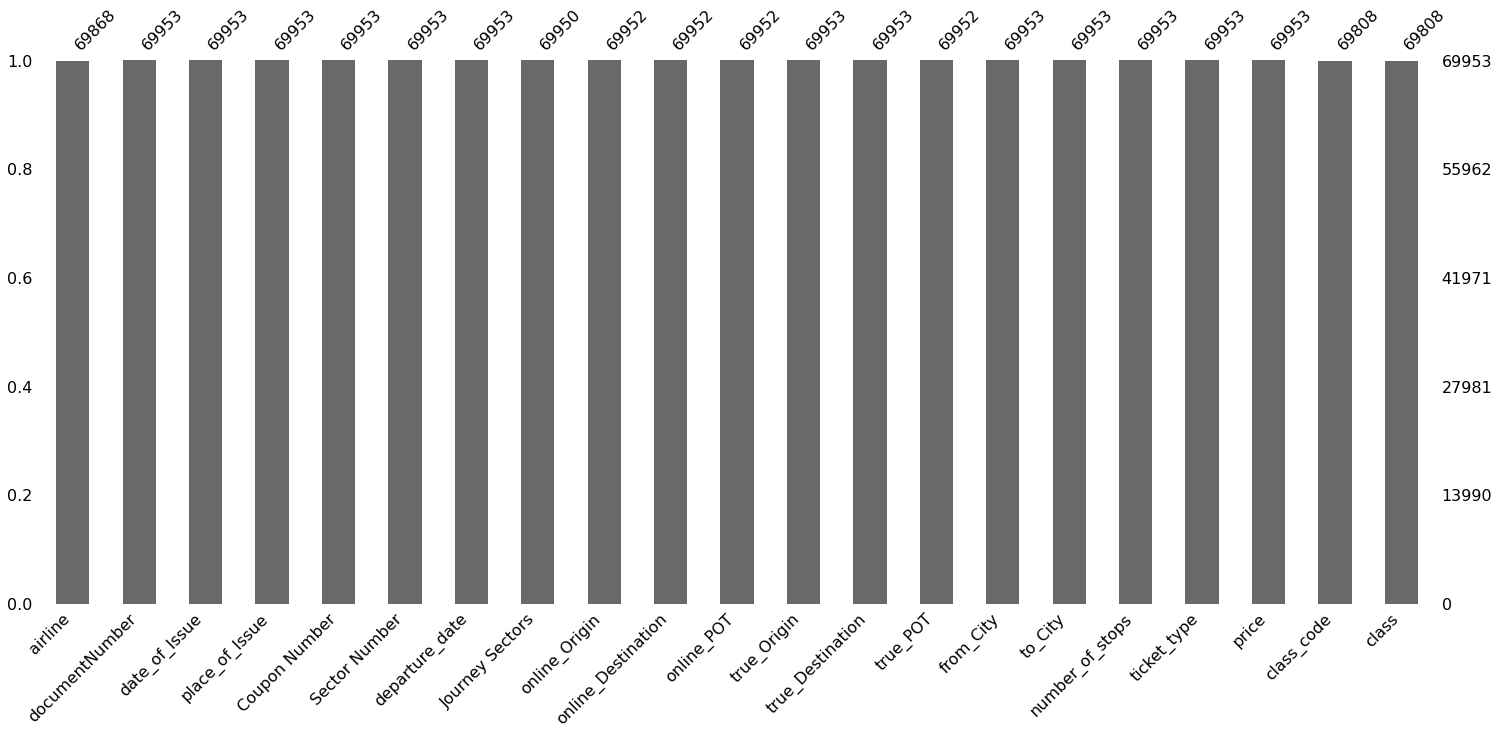

In [5]:
import missingno as msno
msno.bar(df)
plt.show

In [6]:
df.drop_duplicates(subset=['documentNumber'],keep=False,inplace=True)

In [7]:
df.drop(['Coupon Number', 'Sector Number'],axis=1,inplace=True)

In [8]:
#finding the null values
df.isnull().sum()

airline               32
documentNumber         0
date_of_Issue          0
place_of_Issue         0
departure_date         0
Journey Sectors        1
online_Origin          1
online_Destination     1
online_POT             1
true_Origin            0
true_Destination       0
true_POT               1
from_City              0
to_City                0
number_of_stops        0
ticket_type            0
price                  0
class_code            89
class                 89
dtype: int64

In [9]:
#there are only 3 missing values, i can simply drop them
#drop the nullvalues
df.dropna(inplace=True)

#### data cleaning and preprocessing

In [10]:
df.dtypes # datatypes

airline                object
documentNumber          int64
date_of_Issue          object
place_of_Issue         object
departure_date         object
Journey Sectors        object
online_Origin          object
online_Destination     object
online_POT             object
true_Origin            object
true_Destination       object
true_POT               object
from_City              object
to_City                object
number_of_stops         int64
ticket_type            object
price                 float64
class_code             object
class                  object
dtype: object

In [11]:
df['date_of_Issue']=pd.to_datetime(df['date_of_Issue'],format="%d/%m/%Y")
df['departure_date']=pd.to_datetime(df['departure_date'],format="%d/%m/%Y")

In [12]:
#we  are going to extract day and month from columns of booking date and departure time 
#after extracting them, we will drop them as we wont be using itm.

df['booking_day']=df['date_of_Issue'].dt.day
df['booking_month']=df['date_of_Issue'].dt.month
df['departure_day']=df['departure_date'].dt.day
df['departure_month']=df['departure_date'].dt.month

In [13]:
df['days_left']=df['departure_date']-df['date_of_Issue']
df['days_left']=df['days_left'].apply(lambda x:str(x).split(" ")[0])
df['days_left']=df['days_left'].astype("int64")

In [14]:
df['departure_dayname']=df['departure_date'].dt.day_name()

In [15]:
df.drop(['date_of_Issue','departure_date'], axis=1, inplace=True)

In [16]:
df=df[df['airline'].isin(['Rwandair','Kenya Airways','Qatar Airways','Hahn Air','Brussels Airlines','Emirates'])]

In [17]:
df=df.query('`number_of_stops`<=4')
df=df.query('`price`>=50')

In [18]:
def string_col_replace(df,str1,str2,col='class'):
    df.loc[df[col]==str1,str(col)]= str2
    print("You replaced ",str1, "with", str2)
    return df

In [19]:
df=string_col_replace(df,"First Class Discounted",'Business Class Discounted')
df=string_col_replace(df,"First Class",'Business Class')
df=string_col_replace(df,"Economy Discounted Award",'Economy Discounted')
# df=string_col_replace(df,"Economy Discounted",'Economy')

You replaced  First Class Discounted with Business Class Discounted
You replaced  First Class with Business Class
You replaced  Economy Discounted Award with Economy Discounted


In [20]:
df.reset_index(drop=True,inplace=True)

### Check For Outliers

In [21]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2) 

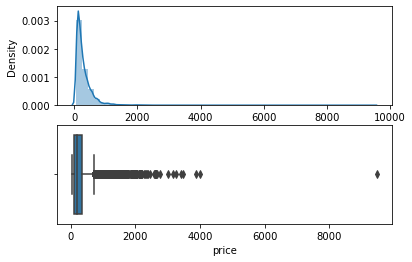

In [22]:
plot(df,'price')

### Handling outliers:
    
    
As there is some outliers in price feature,so we replace it with median.

In [23]:
def remove_outlier(df,col):
    bounds={}
    q1=df[col].quantile(0.1)  #0.05
    q3=df[col].quantile(0.9)   #0.95
    lower_b=q1-(1.5*(q3-q1))
    upper_b=q3+(1.5*(q3-q1))
    bounds[col]=[lower_b,upper_b]
    df[col].where((df[col]>bounds[col][0])&(df[col]<bounds[col][1]),inplace=True)
    return df

In [24]:
df=remove_outlier(df,'price')
df.dropna(inplace=True)

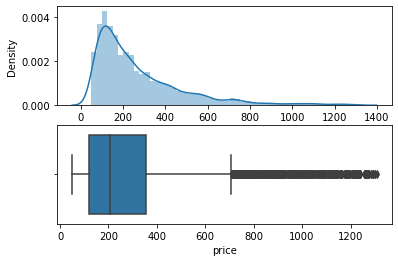

In [25]:
plot(df,'price')

In [26]:
df.rename(columns={'number_of_stops': 'estimated_stops',
                   'true_Origin': 'actual_source',
                   'true_POT': 'actual_destination'},inplace=True)

In [27]:
#Finding the categorical value
column=[column for column in df.columns if df[column].dtype=='object']

In [28]:
cat_cols=['airline','actual_source','departure_dayname','actual_destination','ticket_type','class']

In [29]:
#Finding the continuous value

continuous_col =[column for column in df.columns if df[column].dtype!='object']

### Drop destinations or sources with occurences below 30 

In [30]:
source_dict=df['actual_source'].value_counts().to_dict()

In [31]:
source_drop=[]
for key,val in source_dict.items():
    if val<30:
        source_drop.append(key) 

In [32]:
df=df[~df['actual_source'].isin(source_drop)]

In [33]:
dest_dict=df['actual_destination'].value_counts().to_dict()

In [34]:
dest_drop=[]
for key,val in dest_dict.items():
    if val<30:
        dest_drop.append(key) 

In [35]:
df=df[~df['actual_destination'].isin(dest_drop)]

In [36]:
df.shape

(16278, 23)

#### Handling categorical data

We are using two main Encoding Techniques to covert Categorical data into some numerical format\
Nominal data -- Data that are not in any order -->one hot encoding\
ordinal data -- Data are in order --> labelEncoder

In [37]:
categorical = df[cat_cols]

In [38]:
#dataset that contains categorical data

categorical.head()

,airline,actual_source,departure_dayname,actual_destination,ticket_type,class
3,Brussels Airlines,BRU,Thursday,EBB,Return ticket,Economy Discounted
9,Brussels Airlines,KGL,Tuesday,BRU,One-way,Economy
12,Brussels Airlines,BRU,Tuesday,KGL,One-way,Economy Discounted
16,Brussels Airlines,BRU,Tuesday,KME,Return ticket,Economy Discounted
20,Brussels Airlines,BJM,Monday,YUL,Return ticket,Economy Discounted


### categorical columns vs Price Analysis

#### Airline vs Price Analysis

<AxesSubplot:xlabel='airline', ylabel='price'>

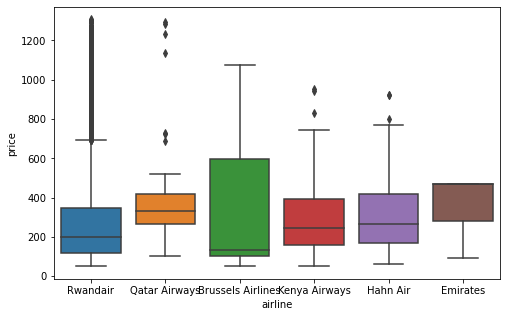

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x='airline',y='price',data=df.sort_values('price',ascending=False))

#### Perform Total_Stops vs Price Analysis

<AxesSubplot:xlabel='estimated_stops', ylabel='price'>

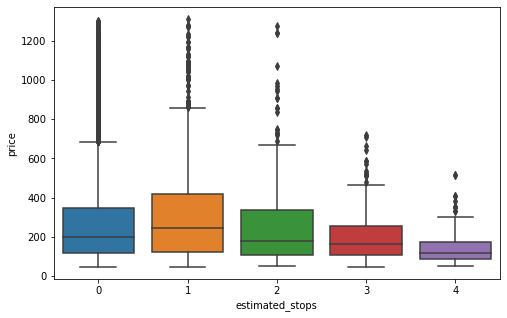

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='estimated_stops',y='price',data=df.sort_values('price',ascending=False))

<AxesSubplot:xlabel='ticket_type', ylabel='price'>

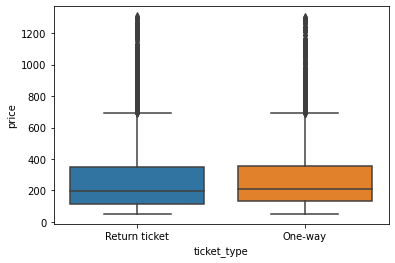

In [41]:
sns.boxplot(x='ticket_type',y='price',data=df.sort_values
            ('price',ascending=False))

<AxesSubplot:xlabel='class', ylabel='price'>

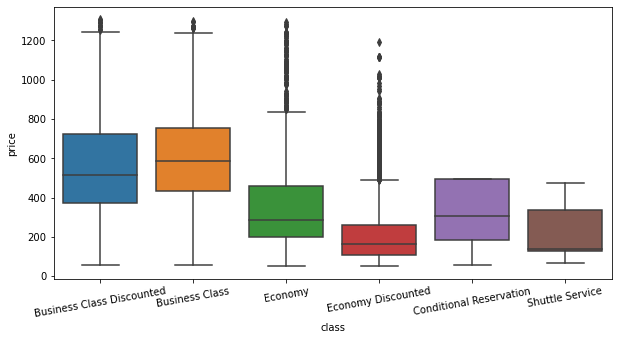

In [42]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=10)
sns.boxplot(x='class',y='price',data=df.sort_values
            ('price',ascending=False))

In [43]:
df=df[['airline', 'ticket_type', 'class', 'actual_source', 'actual_destination',
       'estimated_stops', 'price', 'booking_day', 'booking_month',
       'departure_day','departure_dayname', 'departure_month', 'days_left']]

In [44]:
#df.to_csv('data_case2/final_unlabelled.csv',index=False)

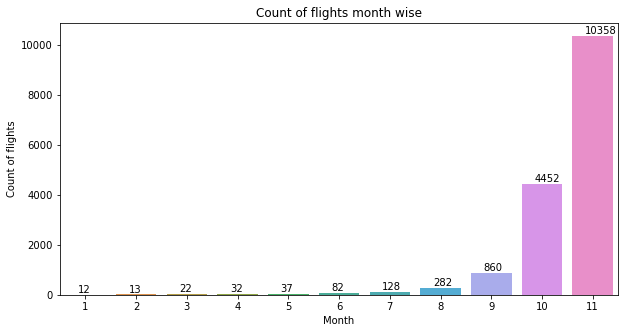

In [45]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'booking_month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x()+0.25, p.get_height()+1), va='bottom', 
                color= 'black')

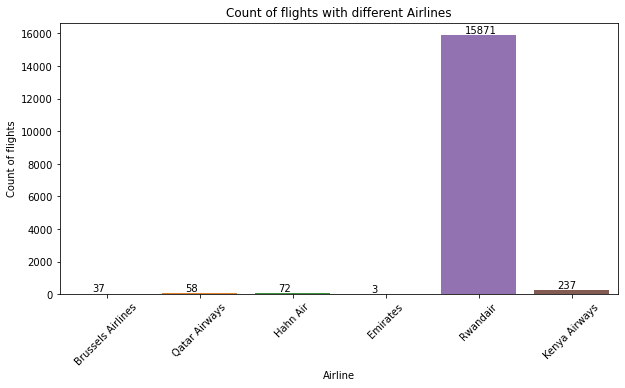

In [46]:
plt.figure(figsize = (10,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, 
                                      p.get_height()+1), 
                va='bottom', color= 'black')

Text(0, 0.5, 'Ticket Price')

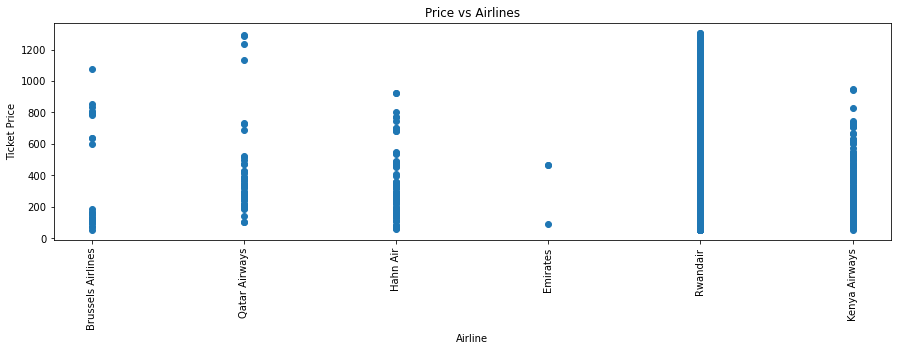

In [71]:
plt.figure(figsize=(15, 4))
plt.title("Price vs Airlines")
plt.scatter(df["airline"], df["price"])
plt.xticks(rotation=90)
plt.xlabel("Airline")
plt.ylabel("Ticket Price")


In [49]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [50]:
categorical['airline'] = encoder.fit_transform(categorical['airline'])
categorical['actual_source'] = encoder.fit_transform(categorical['actual_source'])
categorical['actual_destination'] = encoder.fit_transform(categorical['actual_destination'])
categorical['class'] = encoder.fit_transform(categorical['class'])
categorical['departure_dayname'] = encoder.fit_transform(categorical['departure_dayname'])
categorical['ticket_type'] = encoder.fit_transform(categorical['ticket_type'])

categorical.head()

,airline,actual_source,departure_dayname,actual_destination,ticket_type,class
3,0,5,4,13,1,4
9,0,17,5,5,0,3
12,0,5,5,17,0,4
16,0,5,5,18,1,4
20,0,3,1,24,1,4


In [51]:
continuous_col.remove('documentNumber')

In [52]:
final_df=pd.concat([categorical,df[continuous_col]],axis=1)

In [53]:
final_df.head()

,airline,actual_source,departure_dayname,actual_destination,ticket_type,class,estimated_stops,price,booking_day,booking_month,departure_day,departure_month,days_left
3,0,5,4,13,1,4,1,131.250,21,10,24,11,34
9,0,17,5,5,0,3,1,856.120,29,11,29,11,0
12,0,5,5,17,0,4,0,598.156,28,11,29,11,1
16,0,5,5,18,1,4,1,105.000,15,10,1,11,17
20,0,3,1,24,1,4,2,68.600,24,11,28,11,4


In [54]:
# saving the final dataset
final_df.to_csv('data_case2/final_labelled.csv',index=False)

**separate the dataset in x and y**

In [55]:
X=final_df.drop(['price','booking_day','departure_day','estimated_stops','booking_month','departure_month'],axis=1)
y=final_df['price']

In [56]:
print(X.shape)
X.head()

(16278, 7)


,airline,actual_source,departure_dayname,actual_destination,ticket_type,class,days_left
3,0,5,4,13,1,4,34
9,0,17,5,5,0,3,0
12,0,5,5,17,0,4,1
16,0,5,5,18,1,4,17
20,0,3,1,24,1,4,4


## Modelling

In [57]:
# splitting into testing and training
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

### Random Forest

In [58]:
model_randomF=predict(RandomForestRegressor(n_estimators=200,max_depth=15,max_features='auto'))

Model is: RandomForestRegressor(max_depth=15, n_estimators=200)
Training score: 0.8724045591966356
Predictions are: [408.66276259 208.29925184 366.69276611 ... 158.6641891  156.98441
 624.18726172]


r2 score is: 0.6483530076987327
MSE:15338.576258057159


In [59]:
feat_importance=pd.DataFrame(model_randomF.feature_importances_,index=model_randomF.feature_names_in_,columns=['feat_imp'])

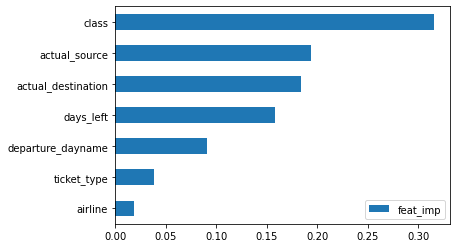

In [60]:
_=feat_importance.sort_values('feat_imp').plot(kind='barh')

### K Neighbors Regressor

In [61]:
model_kn=predict(KNeighborsRegressor())

Model is: KNeighborsRegressor()
Training score: 0.6857578528935131
Predictions are: [543.6872 488.9128 248.0622 ... 131.3968 144.3284 296.303 ]


r2 score is: 0.51999322878967
MSE:20937.5328832207


### Decision Tree Regressor

In [62]:
model_decisionT=predict(DecisionTreeRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9354315985119497
Predictions are: [464.8       381.068      51.281     ... 156.7666875 110.179
 568.389    ]


r2 score is: 0.5071594718707586
MSE:21497.331668615807


### Gradient Boosting

In [63]:
model_gradientB=predict(GradientBoostingRegressor())

Model is: GradientBoostingRegressor()
Training score: 0.5465661619201581
Predictions are: [420.09871401 249.90136969 319.42079824 ... 189.54656869 265.90640444
 588.23207793]


r2 score is: 0.525095413715197
MSE:20714.97942968268


## Best Model and Hpyertunning

Accroding to r2 score, the best model is radnom forest with R^2=0.6

In [64]:
random_grid = {
    'n_estimators' : [200,300,500],
    'max_features':['auto'],
    'max_depth':[5,10,15,20],
    }

In [65]:
# rf=RandomForestRegressor()
# rf_tuned=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

# rf_tuned.fit(xtrain,ytrain)

# # best parameter
# rf_tuned.best_params_

In [66]:
# ypred_tuned= rf_tuned.predict(xtest)
# print(r2_score(ytest,ypred_tuned))

In [67]:
# saving high perfoming model in joblib form
# import joblib

# joblib.dump(model_randomF, open('models_case2/flight_ticket_price_model.sav','wb'))

## Models Ensembling 

In [69]:
model_bagging=predict(BaggingRegressor(base_estimator=XGBRegressor(),n_estimators=200))

Model is: BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None